In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
filepath = 'https://raw.githubusercontent.com/S1mDu/LCA/main/Data/'

In [28]:
# Update the filepath to the local directory where the files are stored

demo = pd.read_excel(filepath + 'demography.xlsx')
#demo = pd.read_excel(demo_url)
tot = pd.read_excel(filepath + 'DR1TOT.xlsx')

In [29]:
df = pd.merge(demo, tot, how='outer', on='SEQN')
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,130378,12,2,1,43,NaN,5,6,2.0,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,130379,12,2,1,66,NaN,3,3,2.0,NaN,...,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,130380,12,2,2,44,NaN,2,2,1.0,NaN,...,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
3,130381,12,2,2,5,NaN,5,7,1.0,71.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,130382,12,2,1,2,NaN,3,3,2.0,34.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [30]:
df.shape

(11933, 194)

In [31]:
df['INDFMPIR']

0        5.00
1        5.00
2        1.41
3        1.53
4        3.60
         ... 
11928    2.01
11929     NaN
11930    1.95
11931    3.11
11932    5.00
Name: INDFMPIR, Length: 11933, dtype: float64

In [32]:
df[df['INDFMPIR'] < 1.2].mean()

SEQN        136316.608521
SDDSRVYR        12.000000
RIDSTATR         1.762862
RIAGENDR         1.555466
RIDAGEYR        32.038585
                ...      
DRD370T          1.714506
DRD370TQ         2.929730
DRD370U          1.967593
DRD370UQ         2.000000
DRD370V          1.998457
Length: 194, dtype: float64

In [33]:
macronutrient = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT']

In [34]:
df[df['INDFMPIR'] < 4][macronutrient].mean()

DR1TKCAL    1888.853283
DR1TPROT      68.245048
DR1TCARB     224.185424
DR1TSUGR      99.928207
DR1TFIBE      14.447904
DR1TTFAT      77.773912
DR1TSFAT      25.560814
DR1TMFAT      26.062762
DR1TPFAT      17.685809
dtype: float64

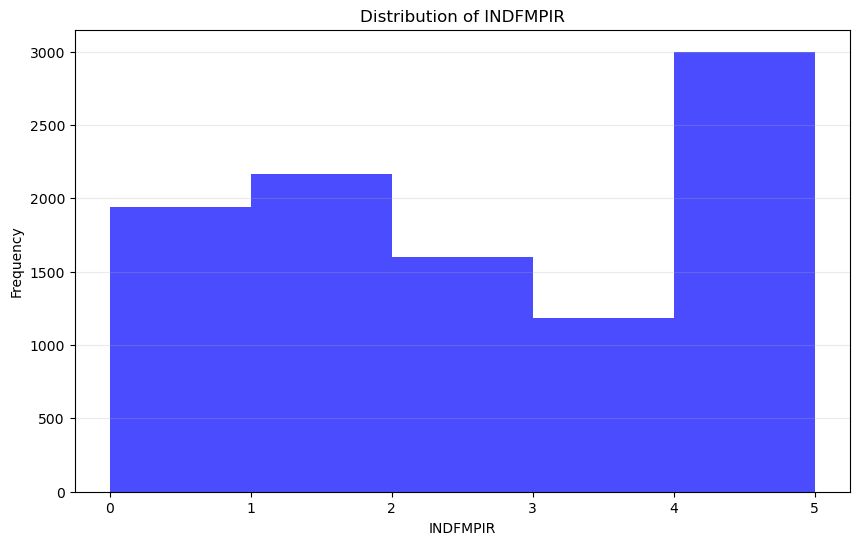

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['INDFMPIR'], bins=5, color='blue', alpha=0.7)
plt.title('Distribution of INDFMPIR')
plt.xlabel('INDFMPIR')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.25)
plt.show()

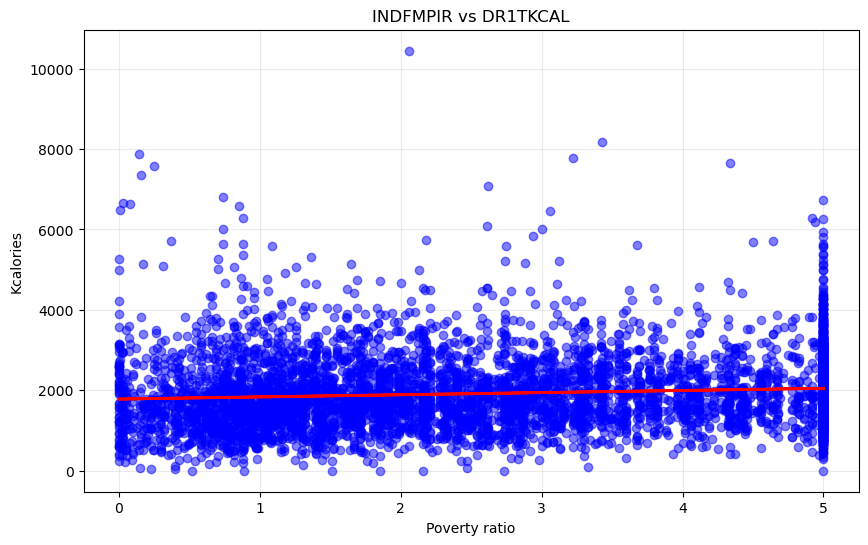

In [36]:
# Remove rows with NaN or Inf values in the relevant columns
cleaned_df = df[['INDFMPIR', 'DR1TKCAL']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['INDFMPIR'], cleaned_df['DR1TKCAL'], 'o', color='blue', alpha=0.5)

# Calculate the line of best fit
coefficients = np.polyfit(cleaned_df['INDFMPIR'], cleaned_df['DR1TKCAL'], 1)
line = np.poly1d(coefficients)
plt.plot(cleaned_df['INDFMPIR'], line(cleaned_df['INDFMPIR']), color='red', linewidth=2)

plt.title('INDFMPIR vs DR1TKCAL')
plt.xlabel('Poverty ratio')
plt.ylabel('Kcalories')
plt.grid(alpha=0.25)
plt.show()

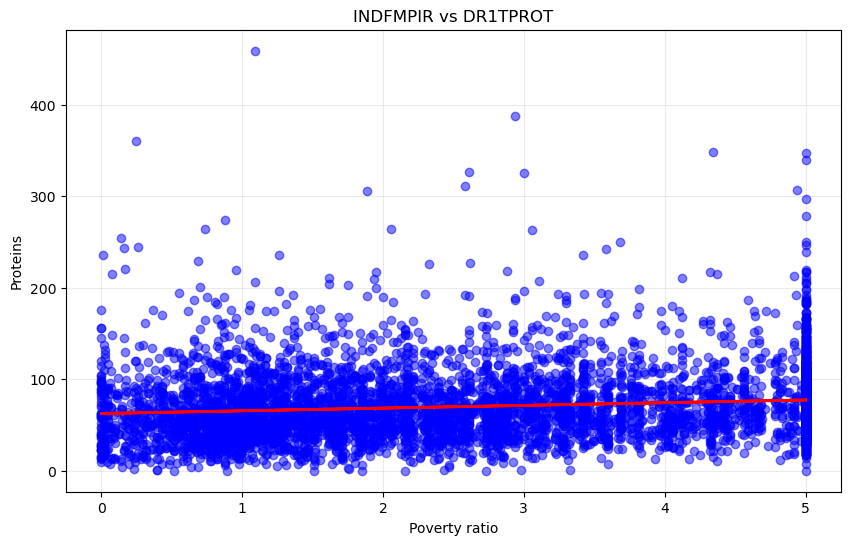

In [37]:
# Remove rows with NaN or Inf values in the relevant columns
cleaned_df = df[['INDFMPIR', 'DR1TPROT']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['INDFMPIR'], cleaned_df['DR1TPROT'], 'o', color='blue', alpha=0.5)

# Calculate the line of best fit
coefficients = np.polyfit(cleaned_df['INDFMPIR'], cleaned_df['DR1TPROT'], 1)
line = np.poly1d(coefficients)
plt.plot(cleaned_df['INDFMPIR'], line(cleaned_df['INDFMPIR']), color='red', linewidth=2)

plt.title('INDFMPIR vs DR1TPROT')
plt.xlabel('Poverty ratio')
plt.ylabel('Proteins')
plt.grid(alpha=0.25)
plt.show()

In [38]:
df[df['INDFMPIR']<5][['INDFMPIR','DR1TKCAL']].dropna()

,INDFMPIR,DR1TKCAL
2,1.41,1995.0
3,1.53,1676.0
4,3.60,1222.0
8,1.33,2422.0
9,1.32,3849.0
...,...,...
11923,1.20,1456.0
11924,2.33,1267.0
11925,0.98,280.0
11926,2.16,1569.0


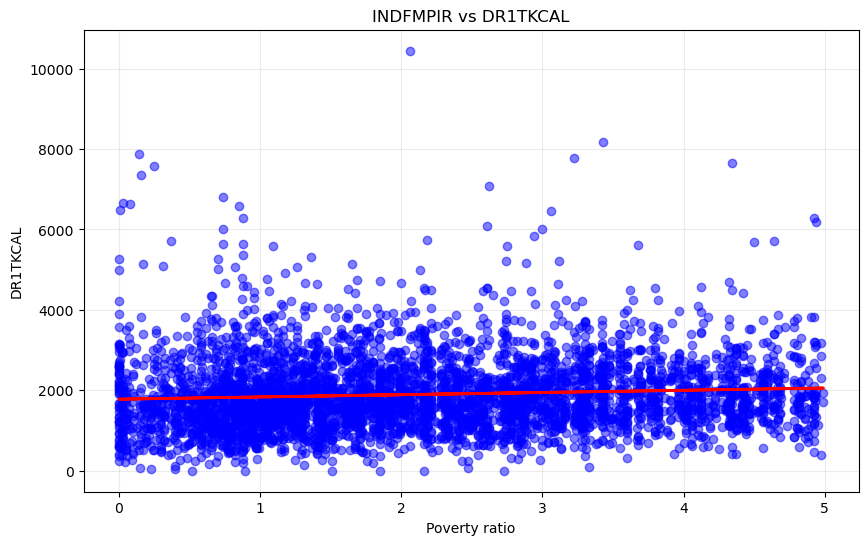

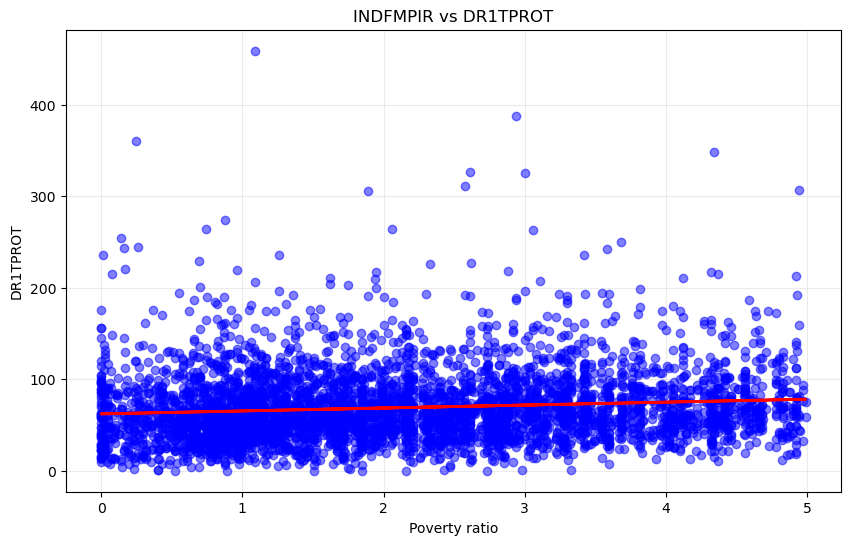

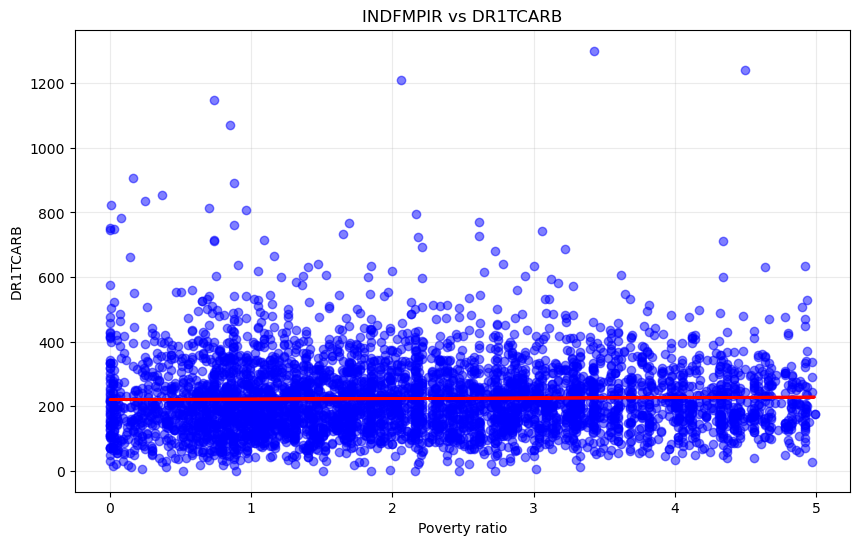

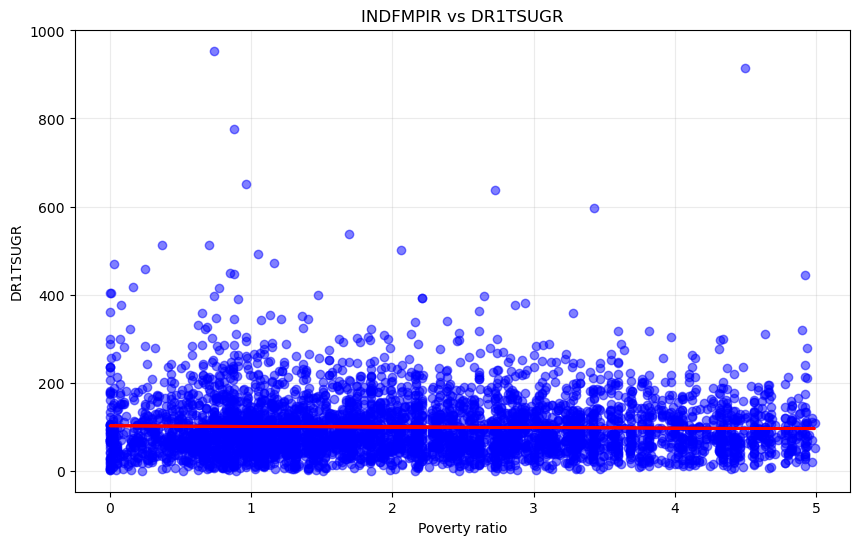

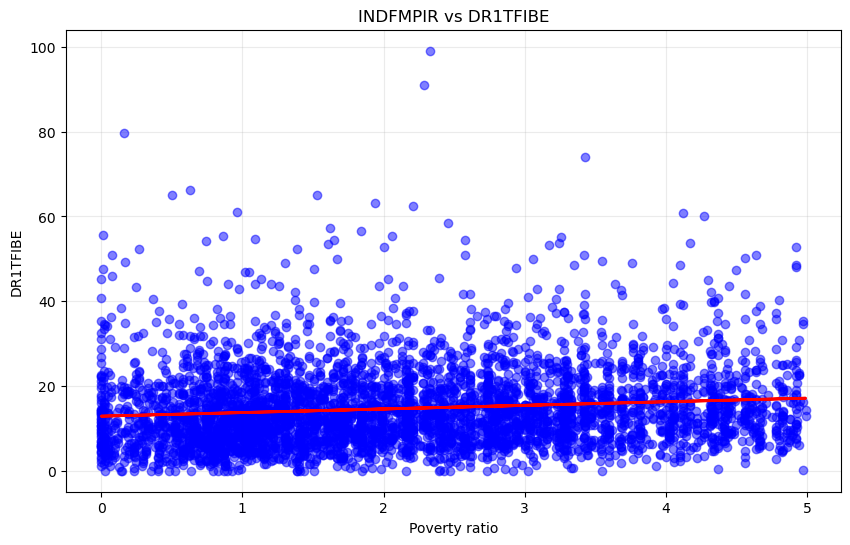

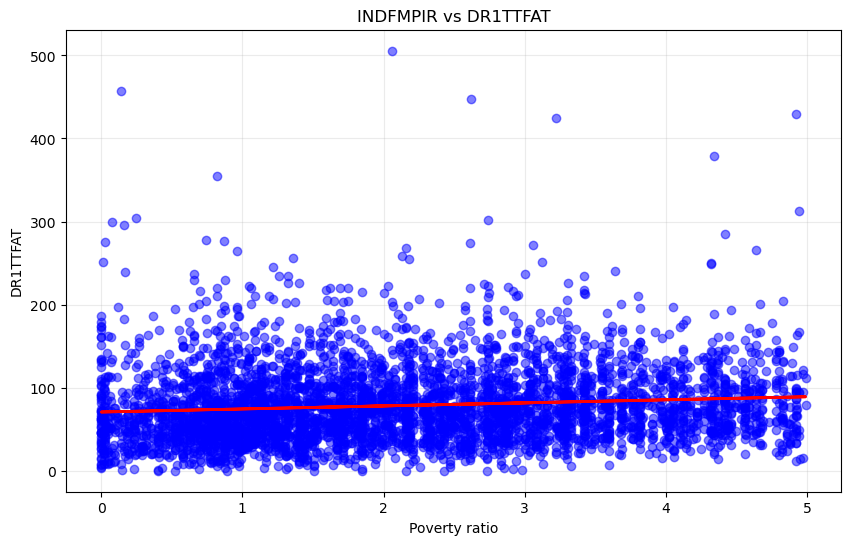

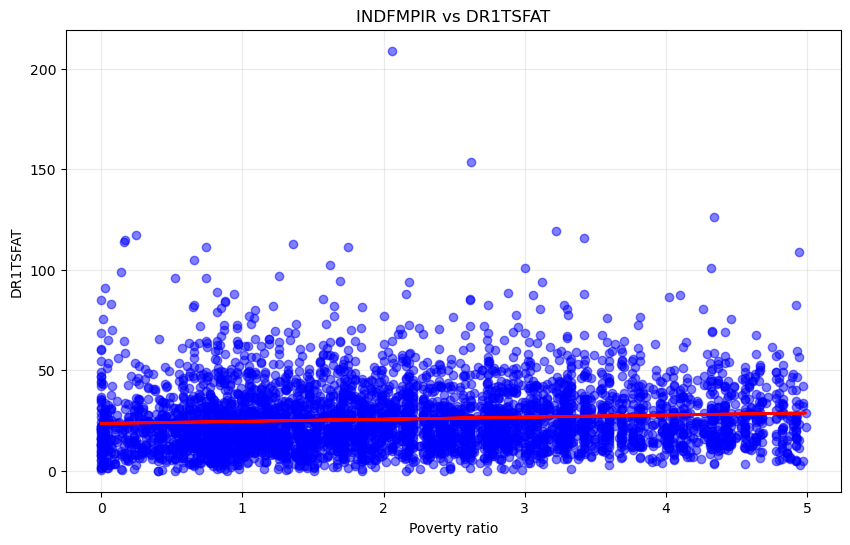

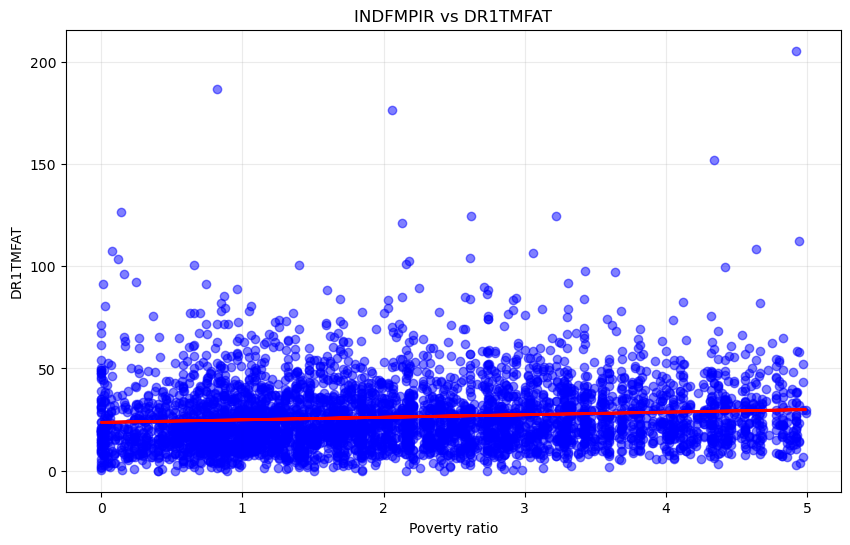

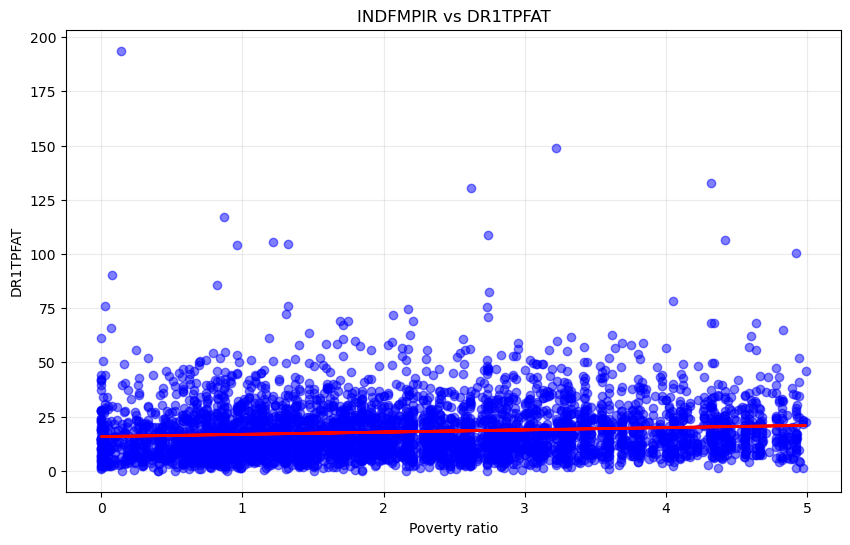

In [39]:
for i in macronutrient:
    cleaned_df = df[df['INDFMPIR']<5][['INDFMPIR', i]].dropna()

    plt.figure(figsize=(10, 6))
    plt.plot(cleaned_df['INDFMPIR'], cleaned_df[i], 'o', color='blue', alpha=0.5)

    # Calculate the line of best fit
    coefficients = np.polyfit(cleaned_df['INDFMPIR'], cleaned_df[i], 1)
    line = np.poly1d(coefficients)
    plt.plot(cleaned_df['INDFMPIR'], line(cleaned_df['INDFMPIR']), color='red', linewidth=2)

    plt.title(f'INDFMPIR vs {i}')
    plt.xlabel('Poverty ratio')
    plt.ylabel(i)
    plt.grid(alpha=0.25)
    plt.show()

In [40]:
df['INDFMPIR'].describe()

count    9892.000000
mean        2.708174
std         1.670119
min         0.000000
25%         1.180000
50%         2.500000
75%         4.500000
max         5.000000
Name: INDFMPIR, dtype: float64

In [41]:
df['INDFMPIR'].quantile(0.25)

1.18

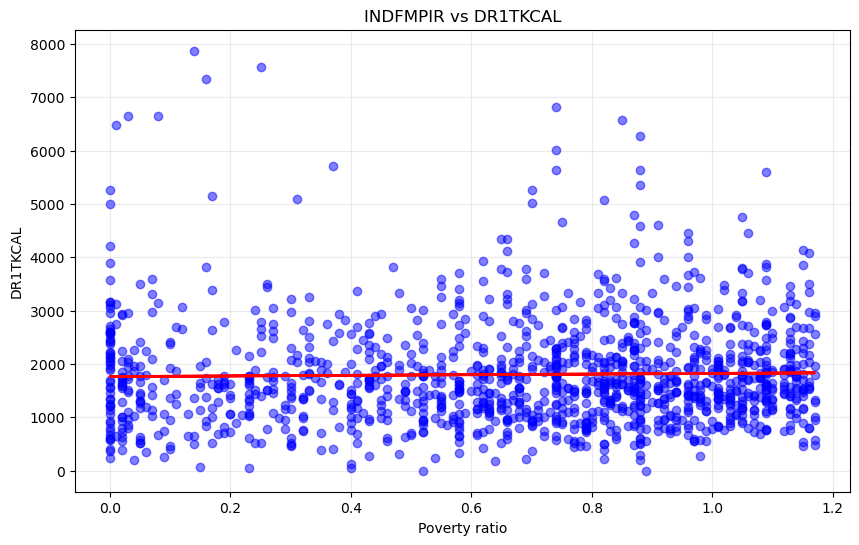

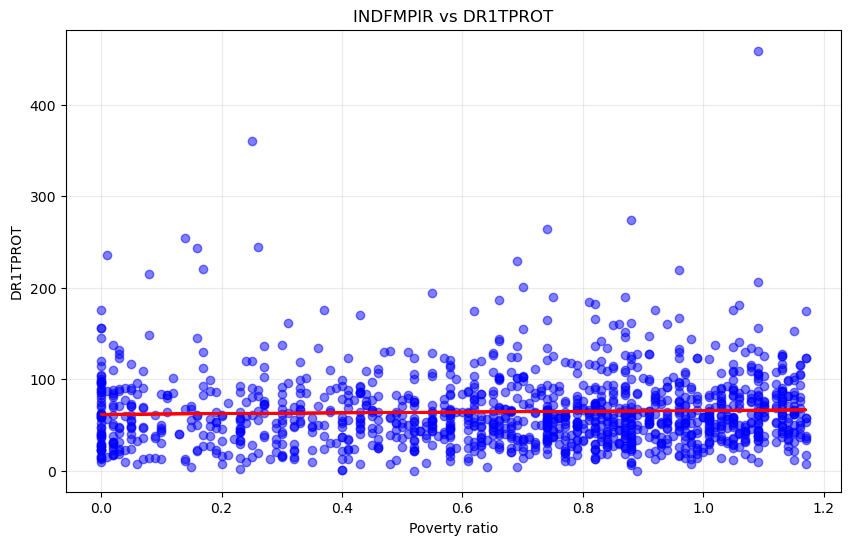

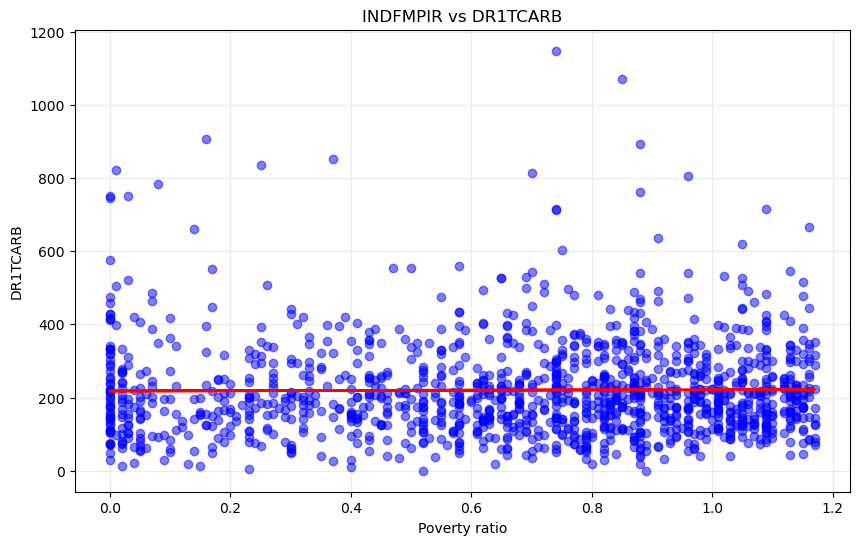

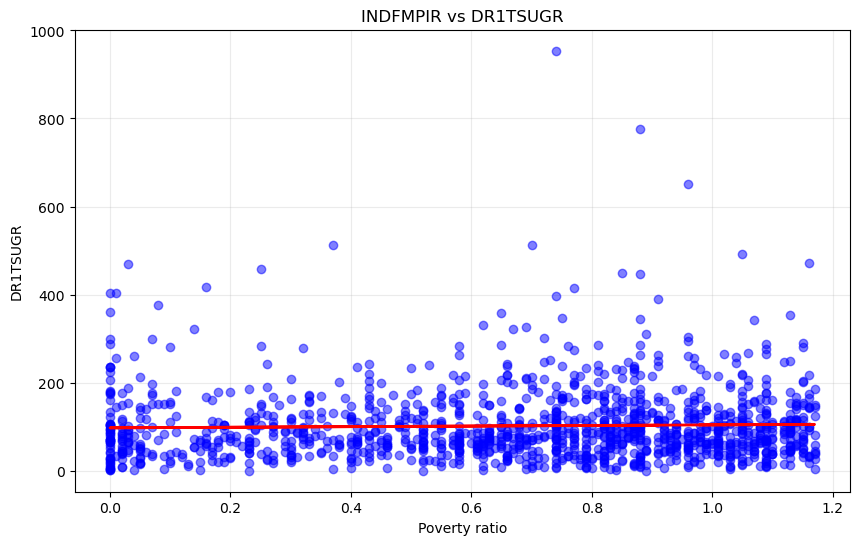

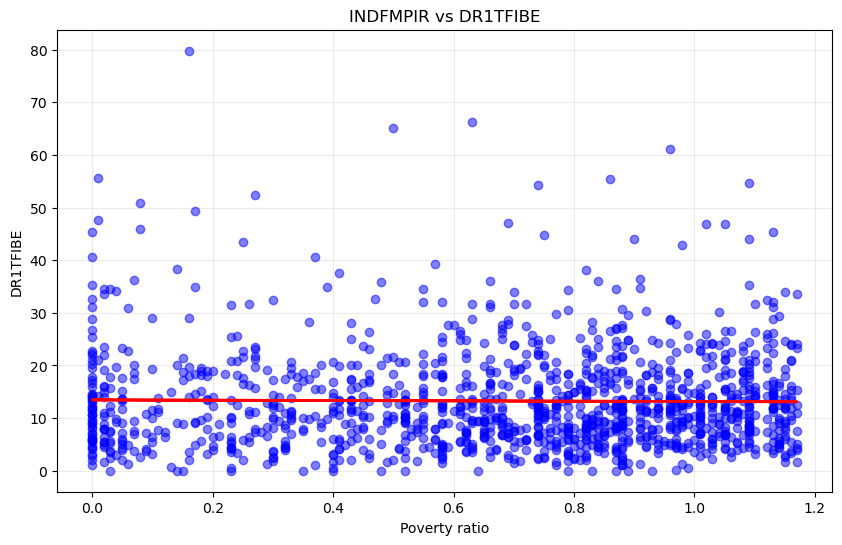

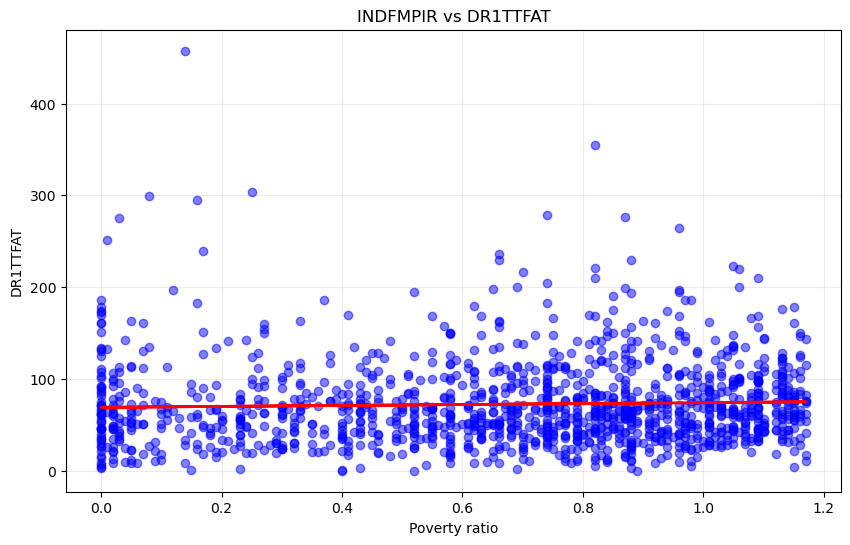

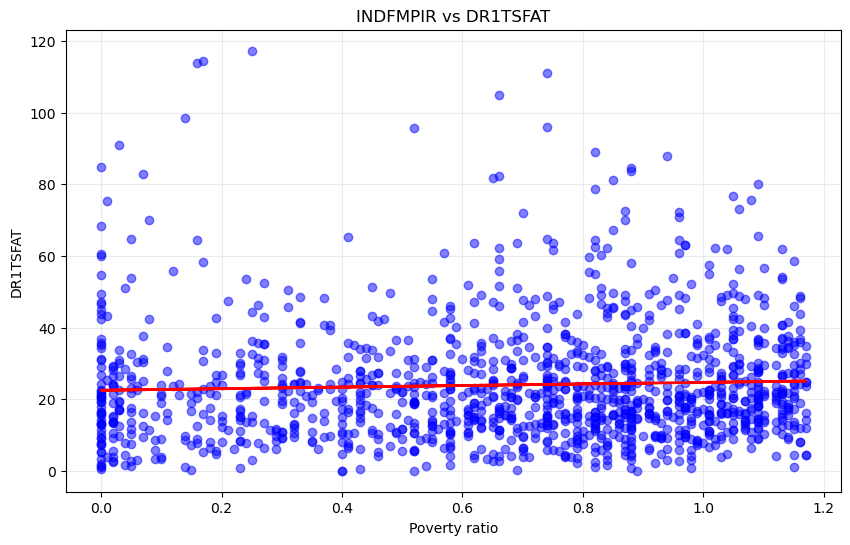

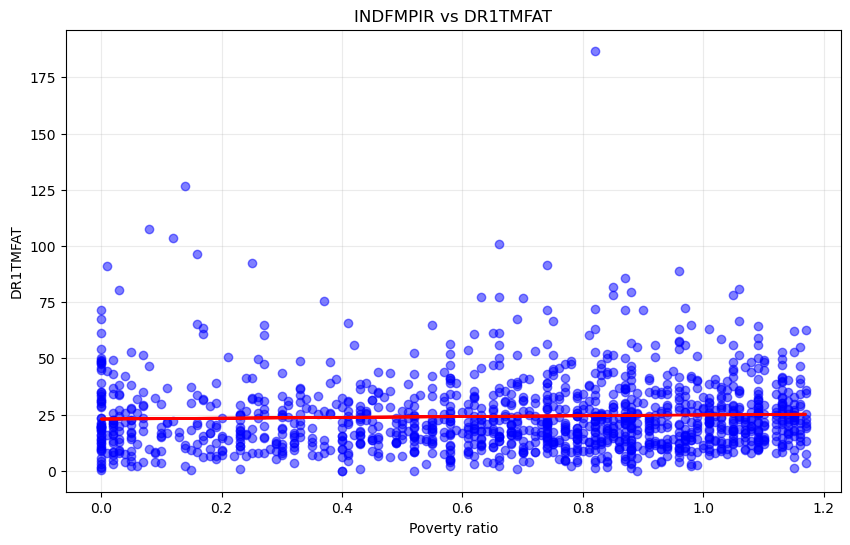

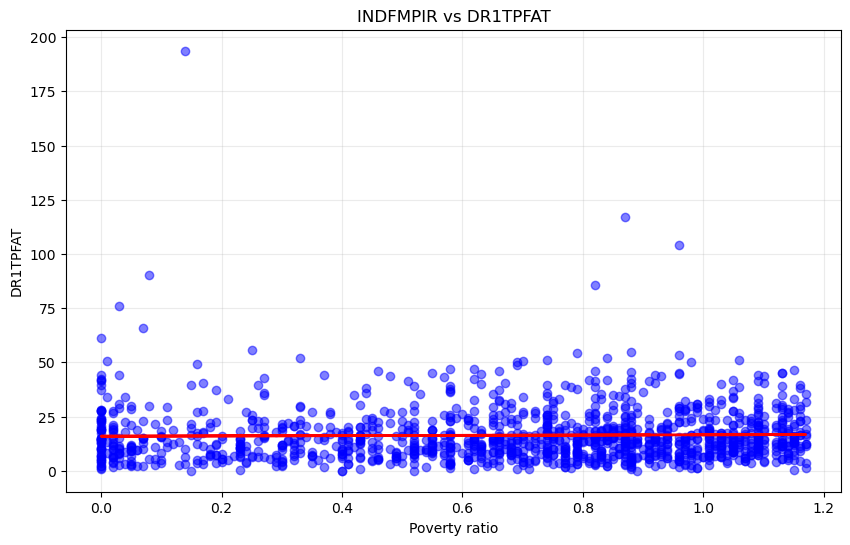

In [42]:
for i in macronutrient:
    cleaned_df = df[df['INDFMPIR']<df['INDFMPIR'].quantile(0.25)][['INDFMPIR', i]].dropna()

    plt.figure(figsize=(10, 6))
    plt.plot(cleaned_df['INDFMPIR'], cleaned_df[i], 'o', color='blue', alpha=0.5)

    # Calculate the line of best fit
    coefficients = np.polyfit(cleaned_df['INDFMPIR'], cleaned_df[i], 1)
    line = np.poly1d(coefficients)
    plt.plot(cleaned_df['INDFMPIR'], line(cleaned_df['INDFMPIR']), color='red', linewidth=2)

    plt.title(f'INDFMPIR vs {i}')
    plt.xlabel('Poverty ratio')
    plt.ylabel(i)
    plt.grid(alpha=0.25)
    plt.show()

In [43]:
df[df['INDFMPIR'] <= df['INDFMPIR'].quantile(0.25)][macronutrient].mean()

DR1TKCAL    1806.220799
DR1TPROT      64.379382
DR1TCARB     220.403693
DR1TSUGR     101.997943
DR1TFIBE      13.232630
DR1TTFAT      72.426986
DR1TSFAT      23.939913
DR1TMFAT      24.210828
DR1TPFAT      16.346430
dtype: float64

In [44]:
df[(df['INDFMPIR'] <= df['INDFMPIR'].quantile(0.25)) & (df['DMDHRGND'] == 1)][macronutrient].median()

DR1TKCAL    1567.000
DR1TPROT      55.340
DR1TCARB     196.710
DR1TSUGR      85.400
DR1TFIBE      10.800
DR1TTFAT      59.140
DR1TSFAT      19.977
DR1TMFAT      18.915
DR1TPFAT      12.851
dtype: float64

In [45]:
print(df['DMDHRGND'].isna().sum(), df['DMDHRGND'].value_counts())


7818 DMDHRGND
2.0    2322
1.0    1793
Name: count, dtype: int64
